# Statistics

Table of Contents:

Quantitative Data
Categorical Data

http://stattrek.com/hypothesis-test/hypothesis-testing.aspx


## Descriptive Statistics

Def: Descriptive Statistics


Quantitative data takes on **numeric values** that allow us to perform mathematical operations (like the number of dogs).

Categorical are used to **label a group** or set of items (like dog breeds - Collies, Labs, Poodles, etc.).


### Categorical Data

Categorical Ordinal vs. Categorical Nominal
We can divide categorical data further into two types: Ordinal and Nominal.

1. Categorical **Ordinal** data take on a ranked ordering (like a ranked interaction on a scale from Very Poor to Very Good with the dogs).  
2. Categorical **Nominal** data do not have an order or ranking (like the breeds of the dog).

### Central Limit Theorem

The Central Limit Theorem states that with a large enough sample size the sampling distribution of the mean will be normally distributed.

## Bootstrapping

https://stats.stackexchange.com/questions/26088/explaining-to-laypeople-why-bootstrapping-works


## 9. Confidence Intervals

We can use bootstrapping and sampling distributions to build confidence intervals for our parameters of interest.

By finding the statistic that best estimates our parameter(s) of interest (say the sample mean to estimate the population mean or the difference in sample means to estimate the difference in population means), we can easily build confidence intervals for the parameter of interest.

#### 9.1 Confidence Intervals Examples:

In [24]:
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.
coffee_red.head(1)

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154


`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [10]:
drink = coffee_red['drinks_coffee'].mean()
dont_drink = 1 - drink
print("Drink: {} \nDon't Drink: {}".format(drink, dont_drink))

Drink: 0.595 
Don't Drink: 0.405


`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [11]:
drink_height = coffee_red.query('drinks_coffee == True')['height'].mean()
dont_height = coffee_red.query('drinks_coffee == False')['height'].mean()
print("Avg Height (Drinks): {:.3f} \nAvg Height (Dont): {:.3f}".format(drink_height, dont_height))

Avg Height (Drinks): 68.120 
Avg Height (Dont): 66.785


`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [12]:
bootsample = coffee_red.sample(200, replace=True)
drink = bootsample['drinks_coffee'].mean()
dont = 1-drink
print("Drink: {} \nDon't Drink: {}".format(drink, dont))

Drink: 0.605 
Don't Drink: 0.395


`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

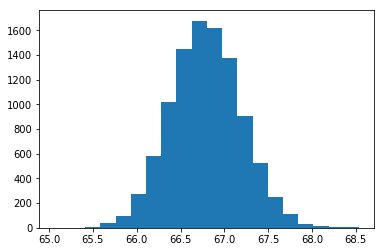

In [14]:
boot_means = []
for _ in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    boot_means.append(bootsample.query('drinks_coffee == False')['height'].mean())

plt.hist(boot_means, bins=20)
plt.show()    

`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [22]:
print('Confidence Interval 95%: {:.3f}, {:.3f}'.format(np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)))
print('Population mean: {:.3f}'.format(coffee_full.query('drinks_coffee == False')['height'].mean()))

Confidence Interval 95%: 66.006, 67.597
Population mean: 66.443


Though you were comparing the average heights of coffee drinkers to non-coffee drinkers, there are a number of other applications that use a comparison for the means of two groups.

A/B testing is one of the most important to businesses around the world. In this technique, you are changing something about your web layout to understand how it impacts users. You ideally want to provide a page that leads to more clicks, higher revenue, and/or higher customer satisfaction.

### 9.2 Practical and Statistical Significance
Using confidence intervals and hypothesis testing, you are able to provide statistical significance in making decisions.

However, it is also important to take into consideration practical significance in making decisions. Practical significance takes into consideration other factors of your situation that might not be considered directly in the results of your hypothesis test or confidence interval. Constraints like space, time, or money are important in business decisions. However, they might not be accounted for directly in a statistical test.

### 9.3 Traditional Confidence Intervals
One educated, but potentially biased opinion on the traditional methods is that these methods are no longer necessary with what is possible with statistics with modern computing, and these methods will become even less important with the future of computing. Therefore, memorizing these formulas to throw at particular situation will be a glazed over component of this class. However, there are resources below should you want to dive into a few of the 100s if not 1000s of hypothesis tests that are possible with traditional techniques.

Each of these hypothesis tests is linked to a corresponding confidence interval, but again the **bootstrapping approach can be used in place of any of these!** Simply by understanding what you would like to estimate, and simulating the sampling distribution for the statistic that best estimates that value.

### 9.4 Summary

It is important to understand the way that your sample size and confidence level relate to the confidence interval you achieve at the end of your analysis.

Assuming you control all other items of your analysis:

1. Increasing your sample size will decrease the width of your confidence interval.
2. Increasing your confidence level (say 95% to 99%) will increase the width of your confidence interval. 

You saw that you can compute:  
  
1. The confidence interval **width** as the difference between your upper and lower bounds of your confidence interval.
2. The **margin of error** is half the confidence interval width, and the value that you add and subtract from your sample estimate to achieve your confidence interval final results.

### 9.5 Confidence Intervals (& Hypothesis Testing) vs. Machine Learning

Confidence intervals take an aggregate approach towards the conclusions made based on data, as these tests are aimed at understanding population parameters (which are aggregate population values).

Alternatively, machine learning techniques take an individual approach towards making conclusions, as they attempt to predict an outcome for each specific data point.

In the final lessons of this class, you will learn about two of the most fundamental machine learning approaches used in practice: **linear** and **logistic** regression.

## 10. Hypothesis Testing

1. The $H_0$ is true before you collect any data.
2. The $H_0$ usually states there is no effect or that two groups are equal.
3. The $H_0$ and $H_1$ are competing, non-overlapping hypotheses.
4. $H_1$ is what we would like to prove to be true.
5. $H_0$ contains an equal sign of some kind - either =, $\leq$, or $\geq$.
6. $H_1$ contains the opposition of the null - either $\neq$, >, or <.

### 10.1 Example (Court)
You saw that the statement, "Innocent until proven guilty" is one that suggests the following hypotheses are true:  
  
$H_0$: Innocent  
$H_1$: Guilty

We can relate this to the idea that "innocent" is true before we collect any data. Then the alternative must be a competing, non-overlapping hypothesis. Hence, the alternative hypothesis is that an individual is guilty.

### 10.2 Example (Webpage)

Because we wanted to test if a new page was better than an existing page, we set that up in the alternative. Two indicators are that the null should hold the equality, and the statement we would like to be true should be in the alternative. Therefore, it would look like this:

$H_0: \mu_1 \leq \mu_2$ 

$H_1: \mu_1 > \mu_2$
 
Here $\mu_1$ represents the population mean return from the new page. Similarly, $\mu_2$ represents the population mean return from the old page. Depending on your question of interest, you would change your null and alternative hypotheses to match.

### 10.3 Type 1 & 2 Errors

**Type I** errors have the following features:

1. You should set up your null and alternative hypotheses, so that the worse of your errors is the type I error.
2. They are denoted by the symbol $\alpha$.
3. The definition of a type I error is: **Deciding the alternative ($H_1$) is true, when actually ($H_0$) is true.**
4. Type I errors are often called **false positives**.

**Type II** Errors 
1. They are denoted by the symbol $\beta$.
2. The definition of a type II error is: **Deciding the null ($H_0$) is true, when actually ($H_1$) is true.**
3. Type II errors are often called **false negatives**.
  
In the most extreme case, we can always choose one hypothesis (say always choosing the null) to ensure that a particular error never occurs (never a type I error assuming we always choose the null). However, more generally, there is a relationship where with a single set of data decreasing your chance of one type of error, increases the chance of the other error occurring.

### 10.4 Parachute Example

### 10.5 Common Types of Hypothesis Tests

You are always performing hypothesis tests on population parameters, never on statistics. Statistics are values that you already have from the data, so it does not make sense to perform hypothesis tests on these values.

Common hypothesis tests include:
1. Testing a population mean (One sample t-test).
2. Testing the difference in means (Two sample t-test)
3. Testing the difference before and after some treatment on the same individual (Paired t-test)
4. Testing a population proportion (One sample z-test)
5. Testing the difference between population proportions (Two sample z-test)

You can use one of these sites to provide a t-table or z-table to support one of the above approaches: t-table, t-table or z-table

There are literally 100s of different hypothesis tests! However, instead of memorizing how to perform all of these tests, you can find the statistic(s) that best estimates the parameter(s) you want to estimate, you can bootstrap to simulate the sampling distribution. Then you can use your sampling distribution to assist in choosing the appropriate hypothesis.

Two ways to approach choosing the Null or Alternative hypothesis to be true:  
- Option 1: Simulate the sampling distribution of our statistic, and see if hypothesis is consistent with what we observe in the sampling distribution.   
- Option 2: Simulate what we believe to be possible under the null and then seeing if our data is actually consistent with that. (more common) 

In [25]:
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.
coffee_red.head(1)

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154


`1.` If you were interested in if the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative be?  

$H_0: \mu_c = \mu_{nc}$  
The average height for all coffee drinkers is the same as the average height for all non-coffee drinkers 

$H_1: \mu_c \neq \mu_{nc}$ 
The average height for all coffee drinkers is **not** the same as the average height for all non-coffee drinkers  

`2.` If you were interested in if the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative be?  

$H_0: \mu_c \leq \mu_{nc}$  
The average height for all coffee drinkers is the same or great than the average height for all non-coffee drinkers 

$H_1: \mu_c > \mu_{nc}$
The average height for all coffee drinkers is less than the average height for all non-coffee drinkers 

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [27]:
coff = []
nocoff = []
delta = []
for _ in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    mean_coff = bootsample.query('drinks_coffee == True')['height'].mean()
    coff.append(mean_coff)
    mean_nocoff = bootsample.query('drinks_coffee == False')['height'].mean()
    nocoff.append(mean_nocoff)
    delta.append(mean_coff - mean_nocoff)

The standard deviation of the sampling distribution for the mean of those that drink coffee.
0.24073763373473


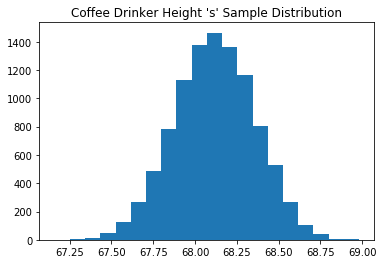

In [34]:
print('The standard deviation of the sampling distribution for the mean of those that drink coffee.')
print(np.asarray(coff).std())
plt.hist(coff, bins=20)
plt.title("Coffee Drinker Height 's' Sample Distribution");

The standard deviation of the sampling distribution for the mean of those that do not drink coffee.
0.40512631277475264


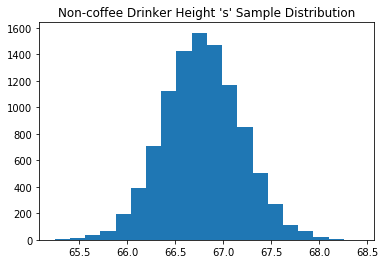

In [35]:
print('The standard deviation of the sampling distribution for the mean of those that do not drink coffee.')
print(np.asarray(nocoff).std())
plt.hist(nocoff, bins=20);
plt.title("Non-coffee Drinker Height 's' Sample Distribution");

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

The standard deviation of the sampling distribution for the difference in means of those that drink coffee and those that do not.
0.4698091074387147


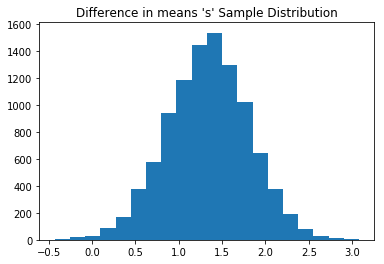

In [37]:
print('The standard deviation of the sampling distribution for the difference in means of those that drink coffee and those that do not.')
print(np.asarray(delta).std())
plt.hist(delta, bins=20);
plt.title("Difference in means 's' Sample Distribution");

In [38]:
print(np.mean(delta))
null_vals = np.random.normal(np.mean(delta), np.std(delta), 10000)

1.336271347481191


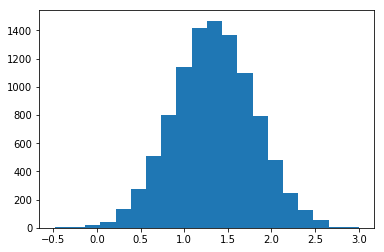

In [40]:
plt.hist(null_vals, bins=20);

We can expect the standard dev of the sampling distribution for differences from the null to be essentially the same as what we observed from the data.  
If the null hypothesis is true, we would expect the difference in the means of coffee drinkers and non-drinkers to be zero. 

## P-value

The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.